# I. Research Question
#### Is there a relationship between how happy a country is and the music the people of this country listen to?

**Table of Contents:**

1. [Introduction](#introduction)
2. [Data Description](#dd)
2. [Preregistration Statements](#pre)
3. [Data Analysis – Evaluation of Significance](#da1)
4. [Data Analysis – Interpretations and Conclusions](#da2)
5. [Limitations](#lims)
6. [Data Collection and Cleaning](#collection)
7. [Exploratory Data Analysis](#exploratory)
8. [Training a model to predict happiness scores in 2020](#training)
9. [Sources](#sources)
10.[Questions for Reviewers](#questions)

### Introduction <a name="introduction"></a>
Attempting to understand what makes a country "happy" is often attributable to freedom, social support, life expectancy, health, among others. However, the music the people of said country listen to is often not one of these factors given its weak relationship and versatility across the world. Although our research question does not attempt to attribute the type of music a country listens to to its happiness index score (it would be difficult to establish given reverse causality), we are more interested in observing what trends are apparent in some of the happiest and less happiest countries with respect to the music they listen to. 

It is no surprise that music is widely used as coping mechanism for any form of distress by most individuals across the world. Neuroscientists have attributed songs like "Don't Stop Me Now" by Queen and "Dancing Queen" by Abba as some of the happiest songs. Indeed, Spotify has thousands of playlists with titles like "Happy Days," "Happy Hits," Just Smile Happy Songs," and "Happy Songs to Sing in The Car" with the goal of increasing mental health awareness and  

#### Some additional questions that we are seeking to answer...
- What songs are there (if any) that are popular in all countries regardless of happiness rank?
- Are there genres/styles of music that are consistent with "happy" countries? With "sad" countries? For example, can we expect happy countries to listen to more pop music than sad ones?
- What are the characteristics of songs that are popular in happy countries? Fast or slow tempo? Live vocals or autotune?
- Can we find more instances of happy songs in sad countries than sad songs in happy countries?"

#### The datasets we will be using:

All the datasets were found on Kaggle.
<br>
1. ["World Happiness Report 2017"](https://www.kaggle.com/unsdsn/world-happiness) by Sustainable Development Solutions Network
<br>
The Sustainable Development Solutions Network ranks 155 countries by their happiness levels, and calculates a "happiness score" for each country using six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. This dataset is for the year 2017.
2. ["Spotify's Worldwide Daily Song Ranking"](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking) by Kaggle user
<br>
For each country in 54 countries, this dataset provides the top 200 songs per day in the year of 2017 (January 1, 2017 to January 9, 2018). 
- *Note: the Kaggle description says 53 countries, but we found 54 countries. Perhaps the description was not updated when the dataset was.*
3. ["Spotify Web API"](https://developer.spotify.com/documentation/web-api/reference/) 
<br>
This dataset contains contains characteristics of songs on Spotify. Spotify calculates and gives scores for their songs. Some of these values include scores for danceability, beats per minute (bpm), and liveness (the likeliness that the song is a live recording).
4. ["World Happiness Report 2020](https://www.kaggle.com/londeen/world-happiness-report-2020?select=WHR20_DataForFigure2.1.csv) by Michael Londeen (Kaggle User, adapted from Sustainable Development Solutions Network)

# II Data Description <a name="dd"></a>
The two datasets we used from Kaggle were a Spotify dataset that compiled the daily top songs from January 2017 to January 2018 for each country and a dataset that compiled the happiness scores and ranks by country. 

**World Happiness Report Dataset**<br>
<br>The happiness score dataset’s rows are the countries that were included in the Gallup World Poll; its columns are country, happiness score, happiness rank, GDP per capita, family, life expectancy, freedom, generosity, government corruption, and dystopia residual. Factors such as GDP per capita, freedom, etc. are used to compute a country’s happiness score, and then their rank once their score is viewed in relation to other countries. 
<br>Much of the data for the world happiness reports comes from the Gallup World Poll. This poll conducts randomized telephone or face-to-face interviews depending on the percentage of a country’s population that has a telephone (cite). The world happiness report is usually published by the Sustainable Development Solutions Network, a branch of the United Nations. The Sustainable Development Solutions Network uploaded the data set for 2015-2019 onto Kaggle. We only use the 2017 dataset. According to the Kaggle dataset, the inspiration for this dataset was to discover the answers to questions like, “What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?”, “How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?”,  “Did any country experience a significant increase or decrease in happiness?” (cite). Since this dataset is published by the Sustainable Development Solutions Network, we can assume that the United Nations funded the creation of this dataset – or at least the data within it.
<br>While Gallup has a very thorough methodology when it comes to carrying out the Gallup World Poll there is still the possibility that people are not honest when they answer the question, or that the poll is not reaching a large/diverse enough group. Additionally, the data that is collected through this poll is affected by the type of person who typically responds to polling questions; for example, people who have very strong opinions about the topic are more likely to agree to be polled than those who have weaker opinions. This may skew the responses to the data. 
<br>To compile this dataset, the Sustainable Development Solutions Network had to take the data from the world happiness reports (which have separate reports for each year) and append the poll data into the necessary columns for each country. This required the Sustainable Development Solutions Network to pick and choose the data in the actual world happiness report that they believed was important to include in the Kaggle dataset. 
The happiness scores are calculated using data that is collected through the Gallup World Poll. The people who answer these questions are aware of the data collection. This is a well-known report that is compiled, however, we are unsure if they are aware of the purpose of the survey.
This is the link to the dataset that was uploaded to Kaggle by the SDSN: https://www.kaggle.com/unsdsn/world-happiness 

**Spotify Dataset**<br>
<br>Each row of this dataset contains a ranking position on a specific day for a song. The columns represent different features of these songs, including position, track name, artist, streams, URL, date, and region. It should be noted that this dataset contains 200 top songs for a given day for 53 countries, which are represented by abbreviated regions.
<br>This dataset was created to identify trends among certain groups of songs within different regions, which would theoretically allow people to predict specific ranks of songs and their respective streams in Spotify. The API, thus, was intended for observing potential  correlations between the data. 
<br>A Kaggle user whose name is Eduardo created this dataset. He is said to be a Software Engineer based in France for the company BlaBlaCar. It is likely the user may have excluded some songs out of this dataset whose information was not entirely present, or that had some data missing. In particular, the user explains the data was missing on a few occasions, so some countries may not have 200 songs for each day from 2017-2018 due to missing data. Thus, only the songs from Spotify that were available at the time of the web-scraping were added to the dataset. The creator of this dataset web-scraped the Spotify charts and we downloaded the Kaggle CSV File of this dataset in order to obtain the information for the songs. No users besides Eduardo were involved in the process according to the specifications of the dataset.
https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking


# III Pre-registration Statements <a name="pre"></a>

The two analyses that we have chosen to perform in our final project are:

1. What is the relationship between the happiness score of a country and the average danceability score of its top songs over two-week periods for a year?
2. What is the relationship between the happiness score of a country and the average valence score of its top songs over two-week periods for a year?
<br>
**Analysis #1**<br> Does the danceability of a song have any correlation with the happiness score of a country?
For our first analysis, we will be performing the rolling average of two weeks (14 days) for our data frame. In sum, this rolling average will take the average danceability score over 14 days by collecting the 50 songs for this period for the top happiest and bottom happiest countries. In particular, we believe there may be a relationship between those countries that score high in the happiness rank and those countries with songs that have high danceability scores. Danceability is often correlated with happiness, hence we believe the top ten [happiest] countries may exhibit particularly high danceability scores. The goal of our project is to understand whether there is any meaningful relationship between happy countries and the music they listen to. As a result, performing a rolling average of the danceability scores of the top happiest and least happy countries will allow us to observe one dimension of happiness from the lenses of danceability. As stated, we expect to see the top happiest countries (e.g., Norway and Iceland) to have high danceability rolling average scores compared to the least happy countries (e.g., Honduras and Portugal).

**Analysis #2** <br>Can we predict the happiness ranking of a country based on Spotify-provided happiness scores (“valence”)?
For every song, the Spotify API provides its own “happiness” score, called “valence.” The higher the valence score, the more positive mood for the song. Using these provided happiness scores, we want to compare the valence for popular songs in sad countries and popular songs in happy countries. If happy countries do have higher valence scores than sad ones, we may find a relevant connection between happiness ranks and the valence scores. If sad countries have higher valence scores than happy countries, we may still be able to find a connection between the variables and presume that sad countries may want to listen to happier songs. Even if there is no significant difference between the valence scores between happy and sad countries, we can still analyze the results and conduct more outside research as to why there is no correlation. This may be related to other Spotify-provided scores, such as “danceability”. Some countries, perhaps Hispanic ones, may have dance built into their cultures even though the happiness scores are variable. All in all, we may find that Spotify’s valence score does not accurately indicate happiness.


# IV Data Analysis <a name="da1"></a>
**Evaluation of significance**<br>
We used various techniques to analyze our data, but our main analysis consisted of a linear regression model to predict happiness score for 2020 based on data we trained from 2017. Specifically, we focused on using certain features (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration_ms) as our predictor variables and our happiness score as our outcome variable. Doing a linear regression model was appropriate for our model because we had already done the correlation of some of these features and happiness score, which all resulted in insignificant results. Therefore, modeling the relationship between happiness score and these features seemed most adequate by fitting a linear equation to the observed data. This was also in line with our hypothesis asserting a positive relationship between happiness score and these features (i.e., we expected our top ten countries to have a positive, quasi-linear relationship between happiness score and some of these features, and the opposite with our bottom ten countries).
<br><br>
It should be noted that we deemed correlation appropriate – and consequently linear regression – after having completed the rolling average of these top and bottom ten countries for a window of 14 days of Spotify songs’ features. We observed virtually no relationship between some of our features like danceability and valence – whose graphs support this conclusion – and happiness score, hence we resorted to other methods of potentially evaluating this relationship. As it pertains to our reasoning behind deciding to run a rolling average, we wanted to understand the possibility of there being a relationship between happiness score and individual features over fourteen days. A rolling, or moving, average analyzes data points by creating a series of averages of different subsets of a full data set, which seemed appropriate for our purposes since we were working with a dataset of ~50 countries for one year. Although we acknowledge that it would have been more compelling to evaluate a rolling average over a longer period [beyond fourteen days], this was impractical given time constraints. We attempted to do this, and the calculation took over three hours; further, the Spotify API – which we are using to obtain all the features for our Spotify songs – could only be run a specific number of times before we got a timing error. 
<br><br>
Our correlation scores indicated there was no strong positive relationship between happiness score and each feature. Our strongest correlation (0.35)  was that between happiness score and duration_ms, which was a trivial feature for our analysis. Nevertheless, we observed slightly more positive correlations when it came to happiness rank (note: this is not the same as happiness score) and liveness (0.7), which prompted us to try the rolling average of individual features and consequently try a linear regression model. Concerning our linear regression training model, our coefficients for all features were insignificant. Nearly all of our coefficients equaled zero, except for some features like "acousticness" and "liveness", which still produced results <0.03.
<br><br><br>
**Interpretation and conclusions** <a name="da2"></a>
Upon having run a linear regression model to predict happiness score for 2020 by training 2017 data – specifically, some of the Spotify features–  our coefficients (which determines the direction of the relationship between our predictor and outcome) were 0 or close to 0. Further, we conducted a rolling average of two of these Spotify features for songs over two weeks for the top and bottom 10 countries in 2017, and our results indicated that there was no significant relationship between happiness score and these Spotify features. As such, we can only conclude that the selected features for Spotify are not a good predicting tool for a country’s happiness, as determined by its happiness score.
<br><br>
We predicted a country’s happiness score could be predicted by the type of music the people of that country listen to. Specifically, we thought features like how danceable a song is would ultimately give us more insight into the overall happiness of people from this country – irrespective of social or political factors affecting this score. Following conventional wisdom, we believed features like danceability, valence, instrumentalism, and liveness were representative of happiness. However, our results indicate precisely the opposite, thus making these features unfit for determining a country’s happiness. 
<br><br>
Without prior knowledge about this potential relationship between a country’s happiness and these Spotify features, analysts could potentially predict a country’s general happiness using features like liveness and danceability. This can be seen as a useful metric for this purpose, given the ability of music to uplift or distress people, which would be generalized to the entire population of certain countries. In particular, we often associate music with mood, given the ability of music to stimulate certain emotions or sensations. A prediction of this sort would theoretically impulse policy-makers – or anyone striving for the overall well-being of a given country – to implement measures and activities using music. Countries ranking low on their happiness score would attempt to assimilate to the music followings of higher-ranking countries on their happiness score. As it relates, pursuing a goal like this is not indicative of a country’s happiness and will likely produce a negligible effect on the country’s happiness. 
<br><br>
Notwithstanding, there may be positive outcomes in following through with this approach. Although this would require further research on the subject matter, the exposure to “happy” music – as determined by high scores of danceability, or other similar features – can improve the well-being and emotional state of people.  Indeed, authors writing on behalf of the American Psychological Association studied precisely this relationship in 2010, asserting that “happiness ratings were elevated for fast-tempo and major key-stimuli and sadness ratings were elevated for slow-tempo and minor-key stimuli'' (Hunter). A different relationship may be observed in a longer period than 14 weeks, but this would require the use of more developed tools beyond only using the Spotify API, given the constraints it poses.

# V Data Limitations <a name="lims"></a>
When conducting this analysis, our group used only the top ten and bottom ten happiest countries, due to the limit on the number of calls you can make to the Spotify API. This limits our data size because we excluded the rest of the countries that are included within the happiness data. This affects our data by not only limiting it but also excluding countries with different cultures and the trends within that nation. 
<br><br>
Using data from 2017 further limits our data set because it is not up-to-date. We recognize that within our analysis that the cultures of the countries that we selected are not varying significantly, so we assumed that the type of music listened to within the different countries would not differ greatly. 
<br><br>

Using the music platform Spotify in itself for this analysis is another limitation because it excludes the other music platforms that may be more popular in different countries. Japan serves as a prime example of this limitation coming into play because Japan does not use Spotify as much as other countries. 
<br><br>

While attempting to extract information from the Spotify API, our group came across issues with the security of Spotify. When re-running our code, there would be errors yielded which stated that we used our maximum amounts of retries. To mitigate this issue, we had to install a Spotify extension for our use. Additionally, Spotify installed an extra layer of security on their Spotify charts website, which hindered our ability to web-scrape the data for 2020. We were able to get 2020 data, however, some days may be missing for certain countries.  
<br>
Another limitation our group recognized was that music listened to globally became more versatile in that people of different nationalities are listening to international music, due to trends. This change might not be reflected within our data analysis because, once again, we are working with data from 2017. 

# VI Data Collection and Cleaning <a name="collection"></a>

In [1]:
#importing relevant packages
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr


#cid AND secret IS SPECIFIC TO EACH USER. SO EVA, ESTELLE, AND CESAR SHOULD HAVE DIFFERENT CID AND SECRET. 
# Do we have to each make our own cid and secret? or can we just use mine?
#Eva's:
cid = '24ac9ca75f06477ca560d8c71807dd9e'
secret = '086fa8a3b056408e9bce55e3245c4af1'

# cid='5decb5b36c3f4465a4aafb6bdf035e5d'
# secret='dcc15f6bb7254c12bede09644e0fb24b'

#Estelle's:
# cid='c10b42de14134edfb7e9cafa42fc48a2'
# secret='b41981d56a924e65a079138f9272e8de'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
                    =client_credentials_manager)

### A. Data cleaning for "World Happiness Report"

In [2]:
#"World Happiness Report 2017"
happy2017=pd.read_csv("2017.csv")
#cleaning up col names
happy2017columns= happy2017.columns
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]
happy2017.columns= happy2017columns
happy2017.head()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy_gdp_per_capita_,family,health_life_expectancy_,freedom,generosity,trust_government_corruption_,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
#removing all columns except for "country", "happiness_rank", and "happiness_score"
happy2017=happy2017.iloc[:,:3]
happy2017.head()

,country,happiness_rank,happiness_score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469


In [4]:
#"Spotify's Worldwide Song Ranking"
#This .csv file was so big that not only could we not push it to GitHub, but it was also difficult to load the file on Sheets.
#Locally on her own computer, Eva split up data.csv into 53 individual .csv files by country so that we work with the data.

#allspotifydata=pd.read_csv("data.csv")
#countries=pd.unique(allspotifydata['Region'])

#allcountries=[]
#for country in countries:
    #allcountries.append(allspotifydata[allspotifydata['Region']==country])

#count=1
#for df in allcountries:
    #name='country'+str(count)+'.csv'
    #df.to_csv(r'C:\Users\Eva\Downloads\country'+str(count)+'.csv')
    #count=count+1

In [5]:
#the 54 country .csv split from data.csv
argentina=pd.read_csv("argentina.csv")
australia=pd.read_csv("australia.csv")
austria=pd.read_csv("austria.csv")
belgium=pd.read_csv("belgium.csv")
bolivia=pd.read_csv("bolivia.csv")
brazil=pd.read_csv("brazil.csv")
canada=pd.read_csv("canada.csv")
chile=pd.read_csv("chile.csv")
colombia=pd.read_csv("colombia.csv")
costarica=pd.read_csv("costarica.csv")
czechrepublic=pd.read_csv("czechrepublic.csv")
denmark=pd.read_csv("denmark.csv")
dominicanrepublic=pd.read_csv("dominicanrepublic.csv")
ecuador=pd.read_csv("ecuador.csv")
elsalvador=pd.read_csv('elsalvador.csv')
estonia=pd.read_csv('estonia.csv')
finland=pd.read_csv("finland.csv")
france=pd.read_csv("france.csv")
germany=pd.read_csv("germany.csv")
Global=pd.read_csv('global.csv')
greece=pd.read_csv('greece.csv')
guatemala=pd.read_csv("guatemala.csv")
honduras=pd.read_csv("honduras.csv")
hongkong=pd.read_csv("hongkong.csv")
hungary=pd.read_csv("hungary.csv")
iceland=pd.read_csv("iceland.csv")
indonesia=pd.read_csv("indonesia.csv")
ireland=pd.read_csv("ireland.csv")
italy=pd.read_csv("italy.csv")
japan=pd.read_csv("japan.csv")
latvia=pd.read_csv("latvia.csv")
lithuania=pd.read_csv("lithuania.csv")
luxembourg=pd.read_csv("luxembourg.csv")
malaysia=pd.read_csv("malaysia.csv")
mexico=pd.read_csv("mexico.csv")
netherlands=pd.read_csv("netherlands.csv")
newzealand=pd.read_csv("newzealand.csv")
norway=pd.read_csv("norway.csv")
panama=pd.read_csv("panama.csv")
paraguay=pd.read_csv("paraguay.csv")
peru=pd.read_csv("peru.csv")
philippines=pd.read_csv("philippines.csv")
poland=pd.read_csv("poland.csv")
portugal=pd.read_csv("portugal.csv")
singapore=pd.read_csv("singapore.csv")
slovakia=pd.read_csv("slovakia.csv")
spain=pd.read_csv("spain.csv")
sweden=pd.read_csv("sweden.csv")
switzerland=pd.read_csv("switzerland.csv")
taiwanprovinceofchina=pd.read_csv("taiwan.csv")
turkey=pd.read_csv("turkey.csv")
unitedkingdom=pd.read_csv("unitedkingdom.csv")
unitedstates=pd.read_csv("unitedstates.csv")
uruguay=pd.read_csv("uruguay.csv")

#### 1. Creating a new happiness dataframe that contains only the relevant countries
As noted in our dataset descriptions, the "Worldwide Happiness Ranking\" (happy17) contains happiness data for 155 countries, while "Spotify's Worldwide Song Ranking" contains only 54 countries. <br><br>We needed to find the overlapping countries between these datasets to:
1. Create a new happiness ranking excluding the countries not found in the song ranking dataset, subsetted in the dataframe **happy**
    <br>
2. Figure out which "Spotify's Worldwide Song Rankings" country .csv files we do not need.

In [6]:
#list of all 54 countries from "Spotify's Worldwide Songs"
allspotifycountries=["argentina", "australia", "austria", "belgium", "brazil","bolivia", "canada", "chile", "colombia", "costarica", "czechrepublic","denmark", "dominicanrepublic", "estonia", "elsalvador", "Global","greece", "ecuador", "finland", "france", "germany", "guatemala", "honduras", "hongkong", "hungary", "iceland", "indonesia", "ireland", "italy", "japan", "latvia", "lithuania", "luxembourg", "malaysia", "mexico", "netherlands", "newzealand", "norway", "panama", "paraguay", "peru", "philippines", "poland", "portugal", "singapore", "slovakia", "spain", "sweden", "switzerland", "taiwanprovinceofchina", "turkey", "unitedkingdom", "unitedstates", "uruguay"]

#list for countries that are found in both datsets.
allcountries=[]
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allspotifycountries:
        allcountries.append(country)      

#new happiness ranking dataframe "happy"        
happy=pd.DataFrame({'country':[],'happiness_rank':[],'happiness_score':[]})
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allcountries:       
        newrow={'country':happy2017.loc[row,'country'],'happiness_rank':happy2017.loc[row,'happiness_rank'],'happiness_score':happy2017.loc[row,'happiness_score']}
        happy=happy.append(newrow, ignore_index=True)

print("There are "+ str(len(allcountries)) +" countries total that we can use to address our research question.")
print("\n")
print('These are the spotify datsets we should use: ' + str(allcountries))
print("\n")
print("This is the updated happiness ranking:")
print(happy)

There are 52 countries total that we can use to address our research question.


These are the spotify datsets we should use: ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 'uruguay', 'guatemala', 'panama', 'france', 'taiwanprovinceofchina', 'spain', 'colombia', 'slovakia', 'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania', 'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras']


This is the updated happiness ranking:
                     country  happiness_rank  happiness_score
0                     Norway             1.0            7.537
1                    Denmark             2.0            7.522
2             

### B. Data cleaning for "Spotify's Worldwide Song Rankings"

In [7]:
#adding the countries we will work with based on the subset below in allcountries. We will use this list to run a for loop to clean the data for each country df
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

#### 1. Deleting indices that carried over from data.csv
As seen in `norway` below, the first column for every country .csv contains an unnamed column. This column, `Unnamed: 0` contains the original indices from the data.csv file.

In [8]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [9]:
def cleancol(df):
    """
    This will change the column names to lowercase and replace spaces with underscores.
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    Returns: the dataframe with the cleaned columns.
    """
    new_colnames = df.columns
    new_colnames = [x.lower().replace(' ', '_') for x in new_colnames]
    df.columns=new_colnames
    df=df.drop(columns=['unnamed:_0'])
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

#### 2. We don't need the top 200 songs per day in a year
The "Spotify Worldwide Song Rankings" from Kaggle is far too excessive for our analysis and research purposes. Providing the top 200 songs per day in a year means that each country .csv file should have around (365+9)x200=74,800 entries (the additional 9 days are because the data set includes the first 9 days of 2018). We decided that we would remove the bottom 150 songs per day in each country's dataset. <br>
It is possible that we may decide to remove even more even later.

In [10]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [11]:
def first_fifty(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    There should only be 200 observations in 1 day, and there are 365 days per country in this data,
    which is the purpose of this function.
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    """
    dataframe = dataframe.groupby("Date").head(50)
    dataframe=dataframe.reset_index(drop=True)
    return dataframe

In [12]:
# FAILED CODE!!! Please see VI. QUESTIONS FOR REVIEWERS
# Our for-loop did not work, as shown in our print statements

#running each country in countries_to_subset through the first_fifty procedure
print("Now deleting the bottom 150 songs per day in each country...")
x=0
for file in countries_to_subset:
    print(allcountries[x]+" length before: "+str(len(countries_to_subset[x])))
#   first_fifty(file) #Did not work
    file=first_fifty(file) #Did not work
#   countries_to_subset[x]=first_fifty(file) #Did not work
    print(allcountries[x]+" length after: "+str(len(countries_to_subset[x])))
    x=x+1
print("\n")
print("Unfortunately the lengths are the same before and after. So we'll have to call first_fifty individally for now.")

Now deleting the bottom 150 songs per day in each country...
norway length before: 74200
norway length after: 74200
denmark length before: 74200
denmark length after: 74200
iceland length before: 35835
iceland length after: 35835
switzerland length before: 74200
switzerland length after: 74200
finland length before: 74200
finland length after: 74200
netherlands length before: 74200
netherlands length after: 74200
canada length before: 74200
canada length after: 74200
newzealand length before: 74200
newzealand length after: 74200
sweden length before: 74200
sweden length after: 74200
australia length before: 74200
australia length after: 74200
costarica length before: 74200
costarica length after: 74200
austria length before: 74200
austria length after: 74200
unitedstates length before: 74200
unitedstates length after: 74200
ireland length before: 74200
ireland length after: 74200
germany length before: 74200
germany length after: 74200
belgium length before: 74200
belgium length after:

#### 3. We cannot use the data from 2018
We only have happiness rankings for the year of 2017, but the Spotify rankings start in January 1, 2017 and stop at January 9, 2018. Though this is only 9 days in 2018, we cannot use this part of the data set.
<br>
To maintain consistency in out datasets, the function below is excludes all observations, or songs, from 2018 accidentally subsetted in our dataframe. 

In [13]:
def not18(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date']).copy()
    dataframe = dataframe[dataframe['Date'].dt.year != 2018]
    return dataframe
#for each in country list, store the return in the dataframe

In [14]:
happy2017columns

['country',
 'happiness_rank',
 'happiness_score',
 'whisker_high',
 'whisker_low',
 'economy_gdp_per_capita_',
 'family',
 'health_life_expectancy_',
 'freedom',
 'generosity',
 'trust_government_corruption_',
 'dystopia_residual']

##### Column Descriptions
- `happiness_score` the sum of each `happiness_score`, `economy_gdp_per_capita_`, `health_life_expectancy_`, `freedom`, `generosity`, `	trust_government_corruption_`, and `dystopia_residual` scores. These individual scores reflect the "six factors" used to calculate happiness in the description above.<br>
- `Happiness.Rank` the ranking of each country's happiness scores, from highest happiness score to the lowest<br>
- `Country` the country being ranked/scored<br>

* **For our research purposes, we will only be keeping the following columns: `country`,`happiness_rank`, and `happiness_score`.**

#### II. "Spotify's World Song Rankings"

In [15]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


##### Column Descriptions
- `position` the rank of the song.<br>
- `track_name` the of the song<br>
- `artist` the artist<br>
- `streams` the streams/day<br>
- `url` the Spotify URL<br>
- `date` the date the songs were streamed<br>
- `region` country, by postal code<br>

In [16]:
filez = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [17]:
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]

In [18]:
for i in range(len(countries_to_subset)):
    countries_to_subset[i]=first_fifty(countries_to_subset[i])
    countries_to_subset[i]=not18(countries_to_subset[i])
    countries_to_subset[i]=cleancol(countries_to_subset[i])

In [19]:
countries_to_subset[i]

,position,track_name,artist,streams,url,date,region
0,1,Otra Vez (feat. J Balvin),Zion & Lennox,6762,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,hn
1,2,Chantaje,Shakira,6467,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,hn
2,3,Safari,J Balvin,5951,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,hn
3,4,Reggaetón Lento (Bailemos),CNCO,5760,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,hn
4,5,Shaky Shaky,Daddy Yankee,5054,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,hn
...,...,...,...,...,...,...,...
18084,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn
18085,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn
18086,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn
18087,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn


#### Description for Work Above
Here we are using the variable countries_to_subset to show whether our three previously defined functions are, in fact, working from the for-loop above the data frame above this text. The function **first_fifty** is subsetting the information of our selected countries by only taking the top fifty songs for each day. The function **not18** is subsetting the information of our selected countries by only taking observations from the year 2017 – excluding 2018. The function **cleancol** is changing column names to lowercase and replacing spaces with underscores; this will facilitate our use of certain Pandas function later in our analyses.

Testing if our change() method successfully changed the column names and dropped rows that contained NAN values:

In [20]:
print(norway.shape)
norway.head()

(74200, 8)


,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [21]:
main=pd.DataFrame()
for country in countries_to_subset:
    main=pd.concat([main,country])
    main=main.reset_index(drop=True)

KeyboardInterrupt: 

#### Description for Work Above
Here, we are merging separate country dataframes for ease of later analysis using the function concat.

In [ ]:
#main=main.drop(columns=['unnamed:_0'])

In [ ]:
groupcount=main.groupby('region').count()
groupcount

#### Description for Work Above
We are grouping our data frame by regions. We are checking if the countries were concatenated properly. It should be noted that some countries, such as Luxembourg ('lu'), are missing a lot of data, which may impact our analyses using this data frame. As will be demonstrated later, Luxembourg will not be used for the final analyses given that it is neither one of the top or bottom 10 countries ([top and bottom ten countries](#topbot)). Looking at the other relevenat columns, however, can see that each country has rougly the same amount of songs.

Testing if the spotipy sp.audiofeatures() method works:

In [ ]:
sp.audio_features('5aAx2yezTd8zXrkmtKl66Z')[0]

We are now creating a method that will enable us to call the sp.audiofeatures() method. After some trial and error, in which we attempted to call use the Spotify API method on every URL on every song, in every row of the dataframe of each country, we realized that our method could never finish executing because the dataframes were so large and also that the Spotify API does have a limit on how many times you call their methods (we weren't allowed to use the Spotify API methods for a certain amount of time).

We developed getunique() to first find all of the unique songs in each dataframe. We realized that for the top daily songs for a year, there is obviously a lot of repititon of songs. So using pd.unique() enabled us to find a way to reduce the amount of times we needed to call sp.audio_features(). This method returns a dataframe that is a collection of the audio features information for every unique song in each country's dataframe. 

After going to office hours and developing the following function, getunique(), we decided that using all 50+ countries was unnecessary for our analysis, and that the Spotify API could not handle so many calls. We decided to compare only the top 10 and bot 10 countries in happiness scores as is demonstrated below this text.

### Top and bottom 10 happiest countries <a name="topbot"></a>

In [ ]:
topbot=pd.DataFrame()
topbot=pd.concat([topbot, happy.head(10)])
topbot=pd.concat([topbot, happy.tail(10)])
topbot=topbot.reset_index(drop=True)
topbot

In [ ]:
main.groupby('region').groups

In [ ]:
names=main.region.unique()
new=names[:10]
new2=(names[len(names)-10:len(names)])
finalnames=np.append(new,new2).tolist()

finalsongs2017=main.loc[main['region'].isin(finalnames)]
finalsongs2017=finalsongs2017.reset_index(drop=True)
finalsongs2017.head()

#### Description for Work Above
We are getting only the unique regions from our "main" data frame, which currently contains the song observations. We are collecting the list of unique region names, which we are then using to check if these region abbreviations are contained in our desired list of regions (finalnames). This step is necessary to subset the songs' information from only the top and bottom happiest countries.

In [ ]:
finalsongs2017['country']=finalsongs2017['region']
finalsongs2017.head()

#### Description
Rather than the name of all of our top and bottom 10 countries being completely spelled out, we are using the region abbreviations.

In [ ]:
#dict for mapping
region_dict={'no':"Norway", 'dk':"Denmark", 'ch':"Switzerland", 'fi':"Finland", 'nl':"Netherlands", 'se':"Sweden", 'ee':"Estonia", 'hu':"Hungary", 'id':"Indonesia", 'is':"Iceland", 'ca':"Canada",
       'nz':"New Zealand", 'au':"Australia", 'tr':"Turkey", 'py':"Paraguay", 'ph':"Philippines", 'do':"Dominican Republic", 'gy':"Greece", 'pt':"Portugal", 'hn':"Honduras"}

In [ ]:
finalsongs2017.country=finalsongs2017['country'].map(region_dict)

In [ ]:
finalsongs2017.head()

#### Description for Work Above
The code above is creating a dictionary of the regions and their respective – top 10 and bottom 10 – countries. We are mapping this to the country column of our finalsongs2017 data dframe. As opposed to having just the abbreviations for the country, we want to have one column with just the region abbreviation and another with the full name of the country.

In [ ]:
spotify2017=topbot.merge(finalsongs2017, on="country")
spotify2017

#### Description for Work Above
We are merging our top and bottom 10 countries on the **country** column of our main data frame containing all songs (finalsongs2017). This new data frame will now be under the variable name spotify2017.

*Note: this **spotify2017** data frame contains our bottom 10 and top 10 happiest countries with their respective song observations. There are 50 observations for each day over the 2017 year for all 20 countries.*

In [ ]:
def getunique(dataframe):
    '''
    creates a dataframe containing the audio features of songs, all scores, which are floats. These audio features are provided by the Spotify API.
    parameters: a dataframe with a 'url' column, which contains valid links to a song on Spotify.
    returns: a dataframe with the audio features as columns, the observations being
    ONLY for the unique songs in the provided dataframe. Because the dataframe contains several repeated songs,
    we will avoid calling the API on duplicated songs because we will get a "max entries error"
    '''
    audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})
    dataframe.drop_duplicates(subset ="track_name",
                     keep = 'first', inplace = True,) #drop duplicate songs
    dataframe=dataframe.reset_index(drop=True)
    for row in range(len(dataframe)):
            url=dataframe.loc[row,'url']
            sub=url.rindex('/')
            idurl=url[sub+1:]
            newrow=sp.audio_features(idurl)[0]
            audiofeatures=audiofeatures.append(newrow,ignore_index=True)
    audiofeatures['track_name']=dataframe['track_name']
    audiofeatures['happiness_score']=dataframe['happiness_score']
    audiofeatures['happiness_rank']=dataframe['happiness_rank']
    audiofeatures['country']=dataframe['country']
    return audiofeatures

In [ ]:
uniquespotify=getunique(spotify2017.copy())

#### Description for Work Above
We are constructing a new function (**getunique**) to create a new data frame that contains all relevant audio features, which we plan on using for our analyses. As noted in the function description, we are only using the unique functions of our data frame, given that many songs may repeat on various days throughout the year. As such, we do not want to have duplicates of the same song as these may jeopardize our analyses findings by placing more weight on certain observations. These features will be saved in the variable **uniquespotify**.

In [ ]:
uniquespotify.head()

In [ ]:
#drop unecessary columns
uniquespotify=uniquespotify.drop(['analysis_url','time_signature','track_href','uri','type'],axis=1)

In [ ]:
uniquespotify.head()

In [ ]:
#reorder columns
uniquespotify=uniquespotify[['country', 'happiness_score', 'happiness_rank','track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms']]

In [ ]:
uniquespotify.head()

#### Description for Work Above
We are changing the order to our data frame columns to create a logical order of the songs, the happiness information, and the track information.

In [ ]:
finalsongs2017=finalsongs2017.merge(uniquespotify[['danceability','track_name' ,'happiness_score', 'happiness_rank', 'energy', 'key', 'loudness', 'mode', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms']], how="left",on='track_name')

In [ ]:
finalsongs2017=finalsongs2017[['country','happiness_score', 'happiness_rank','date','position', 'track_name', 'artist', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'id','duration_ms']]

In [ ]:
finalsongs2017.head()

#### Description for Work Above
We are merging our **finalsongs2017** data frame, which contains the relevant songs for the bottom 10 and top 10 happiest countries, with the features we just extracted from all songs. This will allow us to subset only the songs from these countries, and their respective days. Our updated **finalsongs2017** will now contain these features.

In [78]:
finalsongs2019=pd.read_csv("spotify2019.csv")
topbot=pd.read_csv("happy2019.csv",index_col=0)

In [79]:
topbot

,happiness_rank,country,happiness_score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488
5,6,Switzerland,7.480
6,7,Sweden,7.343
7,8,New Zealand,7.307
8,9,Canada,7.278
9,10,Austria,7.246


In [80]:
#drop nans for later
finalsongs2019.dropna(inplace=True)

# VII Exploratory Data Analysis <a name="exploratory"></a>

In [81]:
topfinal=pd.DataFrame()
split=finalsongs2019[finalsongs2019['country']=='Portugal'].index[0]
topfinal=finalsongs2019[:split]
botfinal=finalsongs2019[split:]

In [82]:
# rolling=pd.DataFrame()
topfinalrolling = topfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
# rolling['avg_danceability']=finalsongs['danceability'].rolling(14).mean()
topfinalrolling=topfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [83]:
finalsongs2019.head()

,Unnamed: 0,position,streams,date,url,track_name,artist,region,country,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,rank
0,0,1,33717,2019-01-01,https://open.spotify.com/track/6MWtB6iiXyIwun0...,Wow.,Post Malone,fi,Finland,0.833,...,0.0,0.1780,0.1630,0.000002,0.101,0.385,99.947,6MWtB6iiXyIwun0YzU6DFP,149520.0,0
1,1,2,29651,2019-01-01,https://open.spotify.com/track/25sgk305KZfyuqV...,Sweet but Psycho,Ava Max,fi,Finland,0.719,...,1.0,0.0476,0.0691,0.000000,0.166,0.628,133.002,25sgk305KZfyuqVBQIahim,187436.0,0
2,2,3,28329,2019-01-01,https://open.spotify.com/track/4RYtaqxjDJUOY2G...,Harmaa Rinne,Teflon Brothers,fi,Finland,0.861,...,0.0,0.1650,0.0410,0.000000,0.150,0.962,129.933,4RYtaqxjDJUOY2GrtkLTFf,170886.0,0
3,3,4,23977,2019-01-01,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next",Ariana Grande,fi,Finland,0.724,...,1.0,0.0658,0.2800,0.000000,0.102,0.435,106.960,2rPE9A1vEgShuZxxzR2tZH,207333.0,0
4,4,5,22435,2019-01-01,https://open.spotify.com/track/00WO1oBxZcj9aBo...,Tavallinen,Keko Salata,fi,Finland,0.803,...,0.0,0.0564,0.6730,0.000010,0.133,0.404,112.964,00WO1oBxZcj9aBoeiODXDx,231791.0,0


#### Description for Work Above
This is the part where we conduct our rolling average for our updated data frame **finalsongs2017**. In particular, we are using Estonia as an index position – given that this is the first of the bottom 10 countries – in order to consider our bottom and top final observations – or split, for the purpose of then grouping by country. We are conducting the rolling average of two weeks for danceability, which we are then merging on the country column.

In [84]:
rolling2=topfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

#### Description for Work Above
We are performing the rolling average for two weeks for valence. 

In sum, we will have conducted the rolling average of two weeks for both danceability and valence, which we believe may best represent the overall "tune" – or how happy a song is – for a given country. 

*Note: We believe a rolling average is necessary here as it will allow us to understand potential trends with respect to the songs individuals in these countries listen to over the course of 14 days. With this in mind, we are making the assumption that **14 days** will be sufficient to generalize the musical trends over the course of one year – and therein, how happy the music the people of a country listen to. Furthermore, we are assuming the results of this window will allow us to gain more insight into the overall kind of music countries listen to, and how this relates to their happiness ranking as a country.*

In [85]:
topfinalrolling['valence']=rolling2['valence']

In [86]:
rolling2['danceability']=topfinalrolling['danceability']

In [87]:
topfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Austria,163800,NaN,7.246,NaN
1,Austria,163801,NaN,7.246,NaN
2,Austria,163802,NaN,7.246,NaN
3,Austria,163803,NaN,7.246,NaN
4,Austria,163804,NaN,7.246,NaN
...,...,...,...,...,...
181995,Switzerland,109195,0.762643,7.480,0.539857
181996,Switzerland,109196,0.757500,7.480,0.513429
181997,Switzerland,109197,0.754071,7.480,0.526714
181998,Switzerland,109198,0.758000,7.480,0.529286


#### Description for Work Above
This new **topfinalrolling** will contain the rolling average of two weeks for **danceability** and **valence** for only the **top 10 countries.**

*Note: The first few observations for our rolling average will be NaN values given that these are the observations being taken to compute the very first rolling average*

In [88]:
botfinalrolling=botfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
# rolling['avg_danceability']=finalsongs['danceability'].rolling(14).mean()
botfinalrolling=botfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [89]:
rolling3=botfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

In [90]:
botfinalrolling['valence']=rolling3['valence']

In [91]:
rolling3['danceability']=botfinalrolling['danceability']

In [92]:
botfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Dominican Republic,236600,NaN,5.425,NaN
1,Dominican Republic,236601,NaN,5.425,NaN
2,Dominican Republic,236602,NaN,5.425,NaN
3,Dominican Republic,236603,NaN,5.425,NaN
4,Dominican Republic,236604,NaN,5.425,NaN
...,...,...,...,...,...
181995,Vietnam,345795,0.679000,5.175,0.492686
181996,Vietnam,345796,0.686071,5.175,0.486614
181997,Vietnam,345797,0.680643,5.175,0.488043
181998,Vietnam,345798,0.659286,5.175,0.494614


#### Description for Work Above
We are now performing the rolling average for the bottom ten countries. We are still only focusing on danceability and valence. This information will now be saved in the variable name **botfinalrolling**.

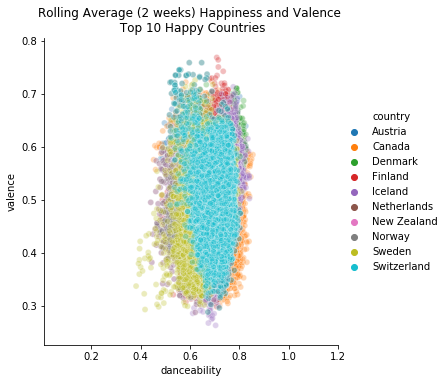

<Figure size 7200x3240 with 0 Axes>

In [93]:
scatter=sns.relplot(x='danceability', y='valence', hue='country', data=topfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.01,1.2))
plt.show()

#### Above Graph Description
This graph is illustrating our rolling average of two weeks for danceability and valence for the top 10 happiest countries, which can be seen on the right.

*Interpretation*<p>As can be seen, the majority of songs for the top 10 countries tend to center around a 0.6 danceability score. This could mean the top 10 happiest countries do not show much disparity in the songs their people listen to. That is, their songs tend to be equally as "danceable." For the purpose of our analysis, this means that our top 10 happiest countries listen to midly danceable music. With respect to valence, however, there appears to be a wider range of valence scores that are covered by the songs these top countries listen to. As such, this may be a fruitless metric in attempting to understand the music these top countries listen to. This would imply valence scores largely vary by song, contrary to danceability, which is more uniform.

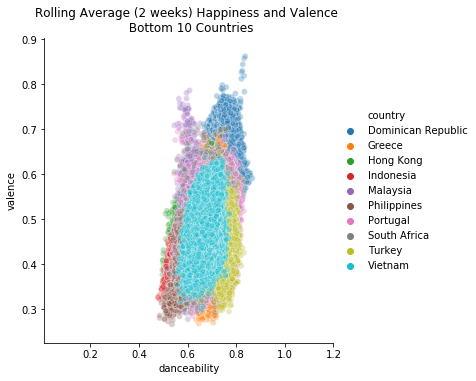

<Figure size 7200x3240 with 0 Axes>

In [94]:
scatter=sns.relplot(x='danceability', y='valence', hue='country', data=botfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Bottom 10 Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.01,1.2))
plt.show()

In [97]:
avg=finalsongs2019.groupby('country').mean()

In [98]:
avg

,Unnamed: 0,position,streams,danceability,happiness_score,happiness_rank,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank
country,,,,,,,,,,,,,,,,,,
Austria,172899.5,25.5,16462.584011,0.713867,7.574190,3.850330,0.662443,5.689011,-6.275741,0.430055,0.155285,0.249452,0.010681,0.153707,0.530584,121.137222,187213.974231,0.0
Canada,154699.5,25.5,105777.108516,0.713905,7.652946,2.493626,0.594117,5.139505,-6.508806,0.545824,0.130653,0.240444,0.011077,0.169140,0.471375,117.942354,191437.583187,0.0
Denmark,27299.5,25.5,37138.216813,0.718297,7.673506,1.565055,0.608354,5.452143,-6.452041,0.455000,0.126762,0.236351,0.007709,0.152468,0.527824,118.132190,185525.915714,0.0
Dominican Republic,245699.5,25.5,7559.400769,0.757185,5.870628,61.648187,0.703511,6.165440,-4.862544,0.527857,0.146937,0.260556,0.006872,0.161468,0.618115,124.096521,230480.686209,1.0
Finland,9099.5,25.5,27875.240879,0.676773,7.769000,1.000000,0.663020,5.129560,-6.368836,0.446484,0.092529,0.201814,0.009496,0.168731,0.511384,119.129309,199207.537033,0.0
Greece,300299.5,25.5,6125.118736,0.718423,6.636809,37.207747,0.632274,5.500055,-6.665205,0.448297,0.138264,0.252965,0.013671,0.158110,0.470025,119.224728,195010.707857,1.0
Hong Kong,227499.5,25.5,7709.870385,0.622039,6.921060,27.415330,0.566009,5.290769,-6.735000,0.682473,0.081686,0.341515,0.007200,0.166651,0.455022,119.366519,211687.606703,1.0
Iceland,63699.5,25.5,3493.017747,0.708010,7.628372,2.496703,0.575703,5.475385,-7.531244,0.501923,0.114460,0.253068,0.015873,0.175444,0.507280,120.274468,191780.606703,0.0
Indonesia,318499.5,25.5,97616.694066,0.614861,6.289107,51.250934,0.524393,5.441923,-7.401547,0.740055,0.068383,0.386864,0.005162,0.160713,0.448238,115.804843,220788.384121,1.0


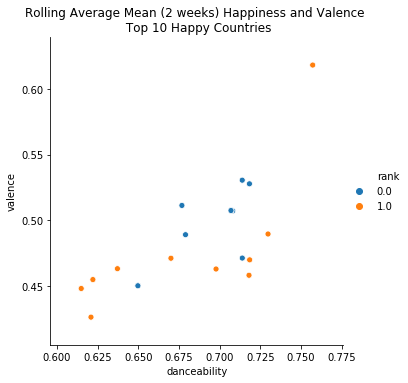

In [101]:
scatter=sns.relplot(x='danceability', y='valence', hue="rank",data=avg)
plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.show()

#### Above Graph Description
Having the rolling average of all observations was relatively difficult to discern any trends, given the overlap of countries. As such, this graph represents the mean of the rolling average of two weeks by country. 

*Interpretation*
<p> Contrary to our expectations, the danceability and valence scores and valence do not show a linear relationship with respect to the top countries in ascending order (i.e., the happiest countries do not coincidentally have the highest danceability or valence scores). There appears to be a wide range of danceability and valence scores for all top countries, which may signify no notable relationship between the danceability and valence scores and the happiness scores of the top countries. Again, we are under the assumption this two-week period is sufficient to draw relevant conclusions (roughly 700 song observations per country).<p>

*Note:The key does not show the countries in their respective order from highest to least happiest country*

**This is the correct order for the top 10 countries from happiest to least happy**
1. Finland
2. Denmark
3. Norway
4. Iceland
5. Netherlands
6. Switzerland
7. Sweden 
8. New Zealand
9. Canada
10. Austria

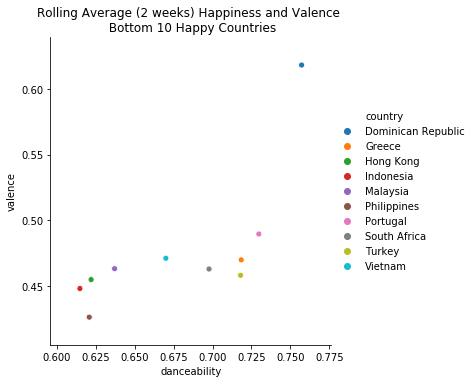

In [20]:
botavg=botfinal.groupby('country').mean()
scatter=sns.relplot(x='danceability', y='valence', hue=botavg.index, data=botavg)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Bottom 10 Happy Countries")
plt.show()

#### Above Graph Description
This graph represents the **mean** rolling average of the bottom 10 countries.

*Interpretation*
<p> There appears to be a more linear relationship between the danceability and valence scores and the 10 bottom happiest countries. By the same token, some of the lowest ranking countries – in terms of happiness– have relatively high danceability scores, as in the case of the Dominican Republic. These, however, can be interpreted as potential anomalies given the other countries do not show a similar pattern. Given that there is a wide range of danceability and valence scores for these countries, we can fairly conclude there is no notable relationship between the danceability and valence and the happiness score of a country. We are still under the assumption a two-week period is sufficient to draw larger conclusions for the overall musical trend of the country. All in all, the rolling average of the top and bottom 10 countries highlights there is no meaningful relationship between how happy a country is and how danceable the music the people of these countries listen to. As it pertains to our research question, this supports the argument that there is no particular relationship between how happy a country is and the danceability and valence of its music. Other features, however, may be at play – independent of danceability and valence – to still assess the signficiance of music on a country's overall happiness rank.<p>
    
*Note: The key does not show the countries in their respective order from highest to least happiest countries*
    
**This is the correct order for the bottom 10 happiest countries from happiest to least happy**
11. Portgual
12. Philippines
13. Hong Kong
14. Indonesia
15. Vietnam
16. Bulgaria
17. South Africa
18. Ukraine 
19. Egypt
20. India

Now we are printing the original happy dataframe but with the average spotify audio feature score for their top daily songs in its own column. This will be useful for any computations or graphic we try and make later in the project.

In [102]:
avg.corr()

,Unnamed: 0,position,streams,danceability,happiness_score,happiness_rank,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank
Unnamed: 0,1.000000,NaN,-0.045656,-0.144462,-0.701176,0.714227,-0.313114,0.061745,-0.155927,0.362707,-0.121187,0.593814,0.304346,-0.228043,-0.269900,0.120438,0.521110,0.867110
position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streams,-0.045656,NaN,1.000000,-0.378598,-0.126335,0.120222,-0.468984,-0.299045,-0.418709,0.509611,-0.337880,0.174978,-0.037636,0.035102,-0.455099,-0.344738,0.295984,-0.067681
danceability,-0.144462,NaN,-0.378598,1.000000,-0.013896,-0.009820,0.713687,0.495724,0.407332,-0.813287,0.916867,-0.522617,0.349451,-0.391917,0.715835,0.415693,-0.339686,-0.171523
happiness_score,-0.701176,NaN,-0.126335,-0.013896,1.000000,-0.998262,0.141223,-0.300961,0.102750,-0.245184,0.011603,-0.559914,-0.352148,0.374724,0.012222,-0.425912,-0.785072,-0.850445
happiness_rank,0.714227,NaN,0.120222,-0.009820,-0.998262,1.000000,-0.156090,0.274935,-0.107005,0.255177,-0.044271,0.574018,0.349961,-0.358435,-0.030998,0.412000,0.790251,0.859597
energy,-0.313114,NaN,-0.468984,0.713687,0.141223,-0.156090,1.000000,0.540963,0.769327,-0.733639,0.676764,-0.681038,0.073430,-0.117832,0.750519,0.472454,-0.258165,-0.312464
key,0.061745,NaN,-0.299045,0.495724,-0.300961,0.274935,0.540963,1.000000,0.504715,-0.267519,0.551400,-0.252101,0.100533,-0.341507,0.662208,0.597232,0.135825,0.112678
loudness,-0.155927,NaN,-0.418709,0.407332,0.102750,-0.107005,0.769327,0.504715,1.000000,-0.304218,0.388267,-0.391233,-0.360229,0.024785,0.694574,0.332429,-0.005210,-0.155810
mode,0.362707,NaN,0.509611,-0.813287,-0.245184,0.255177,-0.733639,-0.267519,-0.304218,1.000000,-0.785736,0.581688,-0.341501,0.294209,-0.511672,-0.348049,0.627255,0.372394


In [ ]:
topavg.corr()

####  Description for Work Above
We understand there were not many significant trends using rolling average for danceability and valence as it pertains to the top and bottom ten countries. Therefore, we will see which features show the highest correlation with happiness score and happiness rank and attempt to draw our following analysis from these results.

In [ ]:
sns.heatmap(topavg.corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Rolling Average (Two Weeks) \n Top 10 Happy Countries")
plt.show()

In [ ]:
sns.heatmap(botavg.corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Rolling Average (Two Weeks) \n Bottom 10 Happy Countries")
plt.show()

In [ ]:
plt.scatter(botavg['happiness_score'],botavg['valence'])
plt.title("Rolling Average Valence \n Bottom 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

In [ ]:
plt.scatter(topavg['happiness_score'],topavg['valence'])
plt.title("Rolling Average Valence \n Top 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=2)
#plt.title("Happiness Score and Danceability \n Top 10 and Bottom 10 Happy Countries")
sns.lineplot(x='happiness_score', y='danceability', data=topfinal, ax=axs[0])
sns.lineplot(x='happiness_score', y='danceability', data=botfinal, ax=axs[1])
axs[0].title.set_text('Top 10 Happy Countries')
axs[1].title.set_text('Bottom 10 Happy Countries')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="danceability",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="danceability",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("Danceability", size=14)
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="valence",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="valence",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("valence", size=14)
plt.show()

### Happiness Score and Danceability
At a first glance, we observe no meaningful relationship between the top 10 countries and the bottom 10 countries as it relates to how danceable the songs these countries listen to are. However, there appears to be a notable trend for the top 10 countries in that the danceability score remains above 0.60 despite there being a decrease at ~7.3 and ~7.5. In comparing both top and bottom 10 countries, however, we cannot draw a truly significant relationship given that many countries from the bottom 10 have relatively high danceability scores – in particular at ~5.3 and ~5.5 – as those danceability scores from the top 10 countries. Additionally, it is worth noting that many of the bottom 10 countries with happiness scores in the range ~5.6-7.3 have constant danceability scores ranging from ~0.63-0.67. We assume this can be due to a commitment to specific, potentially esoteric genres in some countries. In other words, some of these "mildly" happy countries enjoy specific genres, and thus their people listen primarily only to these countries, which coincidentally happen to have "mildly" danceable scores.

In [103]:
happy2020=pd.read_csv('happiness2020.csv')
happy2020=happy2020[['Country name','Ladder score']]
happy2020['happiness_rank']=happy2020.index.copy()
happy2=happy2020.happiness_rank.to_numpy()
happy2=happy2+1
happy2020['happiness_rank']=happy2

In [104]:
cols2020= [x.lower() for x in happy2020.columns] 
cols2020= [x.replace(" ","_") for x in cols2020] 
happy2020.columns=cols2020

In [105]:
happy2020

,country_name,ladder_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
...,...,...,...
148,Central African Republic,3.4759,149
149,Rwanda,3.3123,150
150,Zimbabwe,3.2992,151
151,South Sudan,2.8166,152


# VIII Training a model to predict happiness scores in 2020 <a name="training"></a>
In a separate notebook, we scraped the top songs from 2020 per day per country from the Spotify charts website (this will be explained later). In short, we have a .csv file that is like the `finalsongs2017` dataframe but for 2020 song data. It contains the top 50 songs per day for the whole year for the top 10 and bot 10 happiest countries in 2020. These countries were identified using the Kaggle dataset for the 2020 happiness ranking.
We want to create a model from the 2017 data to predict the happiness scores of the songs in 2020, and we will compare the accuracy of these scores.

In [106]:
spotify2020=pd.read_csv('spotify2020.csv')
names2020=spotify2020.region.unique()


finalsongs2020=spotify2020.loc[spotify2020['region'].isin(names2020)]
finalsongs2020=finalsongs2020.reset_index(drop=True)
finalsongs2020


,Unnamed: 0,position,streams,date,url,track_name,artist,region
0,0,1,39681,2020-01-01,https://open.spotify.com/track/0tc8HGXosQDC8TT...,Hei rakas,BEHM,fi
1,1,2,31179,2020-01-01,https://open.spotify.com/track/3eHkFrUUGYuwEgI...,Pintakaasulla,JVG,fi
2,2,3,30339,2020-01-01,https://open.spotify.com/track/4gEvvWYAF3yzv9h...,Luota Muhun,ibe,fi
3,3,4,30208,2020-01-01,https://open.spotify.com/track/0sf12qNH5qcw8qp...,Blinding Lights,The Weeknd,fi
4,4,5,28966,2020-01-01,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,Dance Monkey,Tones And I,fi
...,...,...,...,...,...,...,...,...
364995,364995,46,78463,2020-12-30,https://open.spotify.com/track/6vo7Y1iWyZvpjvF...,Kalank (Title Track),Arijit Singh,in
364996,364996,47,78233,2020-12-30,https://open.spotify.com/track/3CHZhkihLupVrfY...,Keh Len De,"Kaka, Inder Chahal, Himanshi Khurana",in
364997,364997,48,76745,2020-12-30,https://open.spotify.com/track/7lGhrfren1Zpwh0...,Pal Pal Dil Ke Paas- Title Track,"Arijit Singh, Parampara Tandon",in
364998,364998,49,75260,2020-12-30,https://open.spotify.com/track/7mNZUnDWUDidWBF...,Chidiya,Vilen,in


In [107]:
#simliar protocols from the 2017 dataset were done to merge the 2020 dfs
#making a country col to merge for later
finalsongs2020['country']=finalsongs2020['region']

In [108]:
region_dict2020={'fi':"Finland", 'dk':"Denmark", 'ch':"Switzerland", 'is':"Iceland", 'no':"Norway", 'nl':"Netherlands", 'se':"Sweden", 'nz':"New Zealand", 'at':"Austria", 'ca':"Canada", 'do':"Dominican Republic",
       'gr':"Greece", 'my':"Malaysia", 'vn':"Vietnam", 'id':"Indonesia", 'tr':"Turkey", 'ma':"Morocco", 'za':"South Africa", 'eg':"Egypt", 'in':"India"}


In [109]:
finalsongs2020.country=finalsongs2020['country'].map(region_dict2020)
finalsongs2020.head()

,Unnamed: 0,position,streams,date,url,track_name,artist,region,country
0,0,1,39681,2020-01-01,https://open.spotify.com/track/0tc8HGXosQDC8TT...,Hei rakas,BEHM,fi,Finland
1,1,2,31179,2020-01-01,https://open.spotify.com/track/3eHkFrUUGYuwEgI...,Pintakaasulla,JVG,fi,Finland
2,2,3,30339,2020-01-01,https://open.spotify.com/track/4gEvvWYAF3yzv9h...,Luota Muhun,ibe,fi,Finland
3,3,4,30208,2020-01-01,https://open.spotify.com/track/0sf12qNH5qcw8qp...,Blinding Lights,The Weeknd,fi,Finland
4,4,5,28966,2020-01-01,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,Dance Monkey,Tones And I,fi,Finland


In [110]:
countries2020=happy2020.country_name
spotifycountries2020=pd.unique(finalsongs2020['country'])
happy2020=happy2020.loc[happy2020['country_name'].isin(spotifycountries2020)]
happy2020=happy2020.reset_index(drop=True)

In [111]:
#df with happiness ranking for 2020
happy2020

,country_name,ladder_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
5,Netherlands,7.4489,6
6,Sweden,7.3535,7
7,New Zealand,7.2996,8
8,Austria,7.2942,9
9,Canada,7.2321,11


In [112]:
#more cleaning and merging
happy2020.rename({"country_name":"country"}, axis="columns", inplace=True)
happy2020.rename({"ladder_score":"happiness_score"}, axis="columns", inplace=True)
spotify2020=happy2020.merge(finalsongs2020, on="country")
spotify2020

,country,happiness_score,happiness_rank,Unnamed: 0,position,streams,date,url,track_name,artist,region
0,Finland,7.8087,1,0,1,39681,2020-01-01,https://open.spotify.com/track/0tc8HGXosQDC8TT...,Hei rakas,BEHM,fi
1,Finland,7.8087,1,1,2,31179,2020-01-01,https://open.spotify.com/track/3eHkFrUUGYuwEgI...,Pintakaasulla,JVG,fi
2,Finland,7.8087,1,2,3,30339,2020-01-01,https://open.spotify.com/track/4gEvvWYAF3yzv9h...,Luota Muhun,ibe,fi
3,Finland,7.8087,1,3,4,30208,2020-01-01,https://open.spotify.com/track/0sf12qNH5qcw8qp...,Blinding Lights,The Weeknd,fi
4,Finland,7.8087,1,4,5,28966,2020-01-01,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,Dance Monkey,Tones And I,fi
...,...,...,...,...,...,...,...,...,...,...,...
364995,India,3.5733,144,364995,46,78463,2020-12-30,https://open.spotify.com/track/6vo7Y1iWyZvpjvF...,Kalank (Title Track),Arijit Singh,in
364996,India,3.5733,144,364996,47,78233,2020-12-30,https://open.spotify.com/track/3CHZhkihLupVrfY...,Keh Len De,"Kaka, Inder Chahal, Himanshi Khurana",in
364997,India,3.5733,144,364997,48,76745,2020-12-30,https://open.spotify.com/track/7lGhrfren1Zpwh0...,Pal Pal Dil Ke Paas- Title Track,"Arijit Singh, Parampara Tandon",in
364998,India,3.5733,144,364998,49,75260,2020-12-30,https://open.spotify.com/track/7mNZUnDWUDidWBF...,Chidiya,Vilen,in


The following code is basically the same routine as the 2017 to get a dataframe with the audiofeatures of the Spotify 2020 songs. We have commented out the code because we saved the .csv file in our first time running it and now pd.read_csv rather than running the cells again

In [ ]:
#calling getunique again
# uniquespotify2020=getunique(spotify2020.copy())

In [ ]:
# uniquespotify2020.head()

In [ ]:
# save2020=uniquespotify2020.copy() #saving df in case of mistakes
# uniquespotify2020=uniquespotify2020.drop(['analysis_url','time_signature','track_href','uri','type'],axis=1)

In [ ]:
# uniquespotify2020=uniquespotify2020[['country', 'happiness_score', 'happiness_rank','track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'id', 'duration_ms']]

In [ ]:
# finalsongs2020=finalsongs2020.merge(uniquespotify2020[['danceability','track_name' ,'happiness_score', 'happiness_rank', 'energy', 'key', 'loudness', 'mode', 'speechiness',
# 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms']], how="left",on='track_name')

In [ ]:
# finalsongs2020.head()

In [ ]:
# finalsongs2020.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
# finalsongs2020.drop('a',axis=1,inplace=True)

In [ ]:
# finalsongs2020=finalsongs2020[['country','happiness_score', 'happiness_rank','date','position', 'track_name', 'artist', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'id','duration_ms']]

In [ ]:
# finalsongs2020

In [ ]:
# finalsongs2020.to_csv('finalsongs2020')


In [ ]:
# finalsongs2020=finalsongs2020.copy()
# finalsongs2020.dropna(inplace=True)

In [113]:
finalsongs2020=pd.read_csv("finalsongs2020.csv")

In [114]:
finalsongs2020.head()

,Unnamed: 0,country,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,Finland,7.8087,1.0,2020-01-01,1,Hei rakas,BEHM,39681,0.680,...,-10.319,0.0,0.0282,0.43000,0.000002,0.1350,0.251,115.024,0tc8HGXosQDC8TTAaON1TP,211671.0
1,1,Finland,7.8087,1.0,2020-01-01,2,Pintakaasulla,JVG,31179,0.632,...,-7.157,0.0,0.1960,0.05680,0.000575,0.1080,0.443,129.290,3eHkFrUUGYuwEgIPRPtW9L,141581.0
2,2,Finland,7.8087,1.0,2020-01-01,3,Luota Muhun,ibe,30339,0.754,...,-11.040,1.0,0.0917,0.26400,0.000814,0.1180,0.842,167.089,4gEvvWYAF3yzv9hEY9f3oy,214175.0
3,3,Finland,7.8087,1.0,2020-01-01,4,Blinding Lights,The Weeknd,30208,0.513,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,0sf12qNH5qcw8qpgymFOqD,201573.0
4,4,Finland,7.8087,1.0,2020-01-01,5,Dance Monkey,Tones And I,28966,0.825,...,-6.401,0.0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,209755.0


# Training Model

Single variable linear regression

In [115]:
newcol=['pred_danceability', 'pred_energy', 'pred_key',
       'pred_loudness', 'pred_mode', 'pred_speechiness', 'pred_acousticness', 'pred_instrumentalness',
       'pred_liveness', 'pred_valence', 'pred_tempo', 'pred_duration_ms']
index=0
coeff_determination=[]
predictions=pd.DataFrame()
for feature in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']:
    linear_model=lr()
    linear_model.fit(finalsongs2019[[feature]],finalsongs2019['happiness_score'])
    preds=linear_model.predict(finalsongs2020[['happiness_score']])
    
    predictions[newcol[index]]=preds
    index=index+1
    coeff_determination.append(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020['happiness_score']),2))

In [116]:
predictions['country']=finalsongs2020['country']
predictions=predictions.merge(happy2020,on='country')

In [117]:
predictions

,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms,country,happiness_score,happiness_rank
0,10.061689,9.827401,7.077177,7.79434,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
1,10.061689,9.827401,7.077177,7.79434,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
2,10.061689,9.827401,7.077177,7.79434,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
3,10.061689,9.827401,7.077177,7.79434,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
4,10.061689,9.827401,7.077177,7.79434,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364961,8.299830,8.222221,7.114603,7.59040,6.855192,8.027959,4.896676,5.584333,7.619966,8.043510,7.204890,8.125706,India,3.5733,144
364962,8.299830,8.222221,7.114603,7.59040,6.855192,8.027959,4.896676,5.584333,7.619966,8.043510,7.204890,8.125706,India,3.5733,144
364963,8.299830,8.222221,7.114603,7.59040,6.855192,8.027959,4.896676,5.584333,7.619966,8.043510,7.204890,8.125706,India,3.5733,144
364964,8.299830,8.222221,7.114603,7.59040,6.855192,8.027959,4.896676,5.584333,7.619966,8.043510,7.204890,8.125706,India,3.5733,144


In [118]:
predictions.groupby('country').count()

,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms,happiness_score,happiness_rank
country,,,,,,,,,,,,,,
Austria,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
Canada,18200,18200,18200,18200,18200,18200,18200,18200,18200,18200,18200,18200,18200,18200
Denmark,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
Dominican Republic,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
Egypt,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
Finland,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
Greece,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249,18249
Iceland,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250,18250
India,18267,18267,18267,18267,18267,18267,18267,18267,18267,18267,18267,18267,18267,18267


In [119]:
predictions.drop_duplicates(subset ="country",
                     keep = 'first', inplace = True,)
predictions=predictions.reset_index(drop=True)

In [120]:
predictions

,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms,country,happiness_score,happiness_rank
0,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Finland,7.8087,1
1,9.993842,9.765587,7.078618,7.786487,6.528923,9.122242,2.174712,3.853261,8.242315,9.289913,7.201146,8.125685,Denmark,7.6456,2
2,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Switzerland,7.5599,3
3,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Iceland,7.5045,4
4,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Norway,7.4880,5
5,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Netherlands,7.4489,6
6,9.872333,9.654884,7.081199,7.772422,6.552325,9.043751,2.369954,3.977428,8.197675,9.200510,7.201414,8.125686,Sweden,7.3535,7
7,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,New Zealand,7.2996,8
8,9.958192,9.733108,7.079375,7.782360,6.535789,9.099214,2.231995,3.889691,8.229218,9.263683,7.201225,8.125685,Austria,7.2942,9
9,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,Canada,7.2321,11


In [121]:
predictions.rename({"happiness_score":"obs_happiness_score"}, axis="columns", inplace=True)


first_column = predictions.pop('obs_happiness_score')
predictions.insert(0, 'obs_happiness_score', first_column)

In [122]:
first_column = predictions.pop('country')
predictions.insert(0, 'country', first_column)

The following dataframe `predictions` are the predicted happiness scores of 2020 based on the top songs of their respected countries. `obs_happiness_score` is the real happiness score, and the other columns are the predicted happiness score based on the audiofeature. For example, `pred_danceability` is the predicted happiness scores for each country based on a country's danceability scores for their top songs.

In [123]:
predictions

,country,obs_happiness_score,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms,happiness_rank
0,Finland,7.8087,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,1
1,Denmark,7.6456,9.993842,9.765587,7.078618,7.786487,6.528923,9.122242,2.174712,3.853261,8.242315,9.289913,7.201146,8.125685,2
2,Switzerland,7.5599,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,3
3,Iceland,7.5045,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,4
4,Norway,7.4880,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,5
5,Netherlands,7.4489,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,6
6,Sweden,7.3535,9.872333,9.654884,7.081199,7.772422,6.552325,9.043751,2.369954,3.977428,8.197675,9.200510,7.201414,8.125686,7
7,New Zealand,7.2996,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,8
8,Austria,7.2942,9.958192,9.733108,7.079375,7.782360,6.535789,9.099214,2.231995,3.889691,8.229218,9.263683,7.201225,8.125685,9
9,Canada,7.2321,10.061689,9.827401,7.077177,7.794340,6.515855,9.166070,2.065694,3.783930,8.267241,9.339832,7.200996,8.125684,11


In [124]:
coeff_determination

[-0.02,
 -0.04,
 -0.03,
 -0.02,
 -0.03,
 -0.02,
 -0.02,
 -0.02,
 -0.02,
 -0.03,
 -0.02,
 0.02]

In [ ]:
coeff=pd.DataFrame({'danceability':[0.01], 'energy':[0.0], 'key':[0.0], 'loudness':[0.0], 'mode':[0.0], 'speechiness':[0.0], 'acousticness':[0.03], 'instrumentalness':[0.0],
                    'liveness':[0.01], 'valence':[0.01], 'tempo':[0.0], 'duration_ms':[0.04]})


In [ ]:
coeff

Oddly`duration_ms` (the length of a song) has the highest coefficient of determination. According to the coefficient of determination, around 4% of the variation in the happiness scores of different countries can be explained by the length of a song. However, this is extremely small. As we can see with these determination scores and the following graphs, the model we created for a single variable is not very accurate.

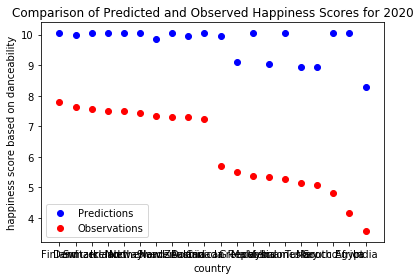

In [125]:
#finalsongs[[feature]],finalsongs['happiness_score']

plt.scatter(predictions['country'],predictions['pred_danceability'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on danceability')
plt.tight_layout()

Text(0.5, 1, 'Comparison of Predicted and Observed Happiness Scores for 2020')

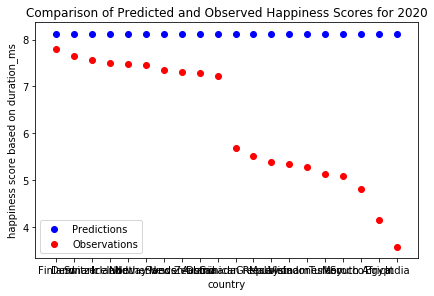

In [126]:
plt.scatter(predictions['country'],predictions['pred_duration_ms'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.xlabel('country')
plt.ylabel('happiness score based on duration_ms')
plt.tight_layout()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')

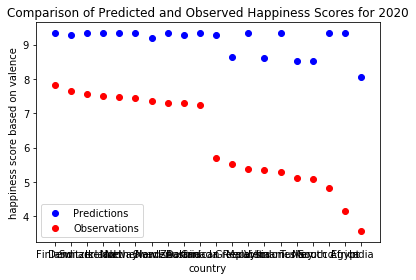

In [127]:
plt.scatter(predictions['country'],predictions['pred_valence'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on valence')
plt.tight_layout()

# Multivariable Linear Regression

In [130]:
multi_lin_model=lr()
multi_lin_model.fit(finalsongs2019[['energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019['happiness_score'])

for x, feature in enumerate(['energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']):
    print('{} coefficient: {:.2f}'.format(feature, multi_lin_model.coef_[x]))

print('r^2 of the model: '+str(round((multi_lin_model.score(finalsongs2019[['energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019['happiness_score'])),2)))

energy coefficient: -0.32
acousticness coefficient: -0.69
liveness coefficient: 0.09
valence coefficient: 0.13
tempo coefficient: -0.00
duration_ms coefficient: -0.00
r^2 of the model: 0.1


In [131]:
clist=pd.unique(finalsongs2019.country)
clist

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Portugal', 'Philippines', 'Hong Kong', 'Dominican Republic',
       'Turkey', 'Malaysia', 'Greece', 'Indonesia', 'Vietnam',
       'South Africa'], dtype=object)

In [132]:
# multhap=pd.DataFrame()
mult_pred_happy=[]
for country in clist:
    country_pred=finalsongs2020[finalsongs2020['country']==country]
    mean_scores=pd.DataFrame(country_pred.mean()).T
    mult_pred=multi_lin_model.predict(mean_scores[['energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']])
    mult_pred_happy.append(mult_pred[0])
# multhap['country']=clist
# multhap['pred_happiness_score']=mult_pred_happy

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
multhap=pd.DataFrame()
multhap['country']=clist
multhap['pred_happiness_score']=mult_pred_happy

In [ ]:
multhap['obs_happiness_score']=predictions['obs_happiness_score']

In [ ]:
multhap

In [ ]:
plt.scatter(multhap['country'],multhap['pred_happiness_score'],c='blue', label='Predictions')
plt.scatter(multhap['country'],multhap['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on energy, acousticness, liveness, valence, tempo, duration_ms')
plt.tight_layout()
plt.show()

Just by looking at these graphs, there does not seem to be any clear relationship between the song features and the happiness score of a country. Though multiple regression seems to be a better predictor than single linear regression.

# IX Sources <a name="sources"></a>
**Source Code** <br>
GitHub  Repository: https://github.com/Albina-C/INFO-2950-Project 

**Appendix** <br>
Web-Scraping Notebook: https://drive.google.com/file/d/1uBqzwdF6lvnUKfJwuds8RsQsXBPl1LFz/view?usp=sharing 

**Acknowledgements** <br>
Spotipy: https://spotipy.readthedocs.io/en/2.18.0/ 
<br>
Cloudscraper: https://pypi.org/project/cloudscraper/ 
<br>
Web-Scraping Code Inspiration: https://gist.github.com/hktosun/d4f98488cb8f005214acd12296506f48 


# X Questions for Reviewers <a name="questions"></a>
1. What parts of our notebook need more explanation (code, graphs, cleaning, etc)?
2. After seeing that we have concluded that there is very little relation between a country's happiness and their most popular songs on Spotify, is there something you are curious to know (for us to explore)? What would you like to see more of and what would you like to see less of?
3. We plan on not using the Spotify Kaggle data sets for the final project, so some of the data description questions will not be applicable. How should we go about answering these questions when we construct our dataset?
4. Is training only on 2020 (given this is what we have) sufficient to refute our claim that these features are not predictive of happiness score?